<a href="https://colab.research.google.com/github/IggyZhao/Python-Skills-by-Iggy/blob/master/Gradient_Boosting_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Data Generation

In [ ]:
x = np.arange(0,50)
# just random uniform distributions in differnt range
y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)
y = np.concatenate((y1,y2,y3,y4,y5))

y

array([10.71568625, 10.31255991, 13.19376172, 11.7890144 , 10.56440505,
       10.5464254 , 11.05496488, 10.48974985, 10.12986119, 14.62100814,
       21.3354728 , 23.93556377, 24.44949296, 24.26182075, 24.95649781,
       23.39501827, 20.89565077, 21.72973909, 24.10099354, 20.786267  ,
        1.50823222,  1.12541711,  4.16744933,  1.23437254,  3.09995425,
        4.01561668,  2.87001145,  3.59896273,  4.85992288,  4.35127998,
       31.78897567, 31.34046746, 31.33672254, 31.61405323, 31.77853432,
       31.86925132, 31.91810706, 31.64704407, 30.93907161, 30.19552676,
       13.07530287, 15.54579026, 16.15011338, 16.22267203, 16.53062657,
       14.56833823, 15.65490731, 16.04145137, 13.28868196, 15.05937194])

Text(0.5, 1.0, 'To Fit A Model That Predict Y From X')

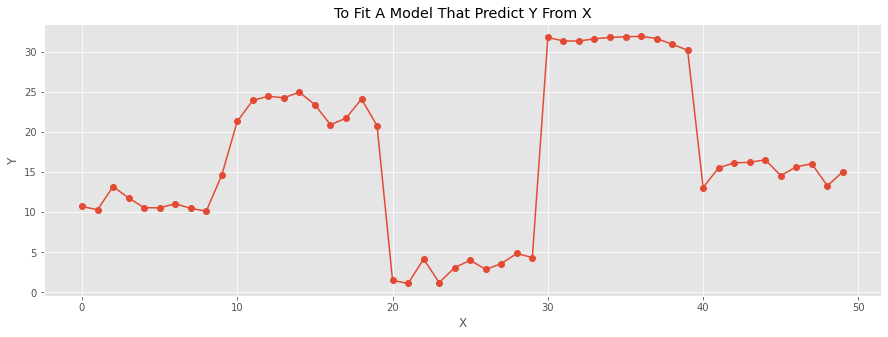

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('To Fit A Model That Predict Y From X')

Fit models

In [ ]:
from sklearn.tree import DecisionTreeRegressor

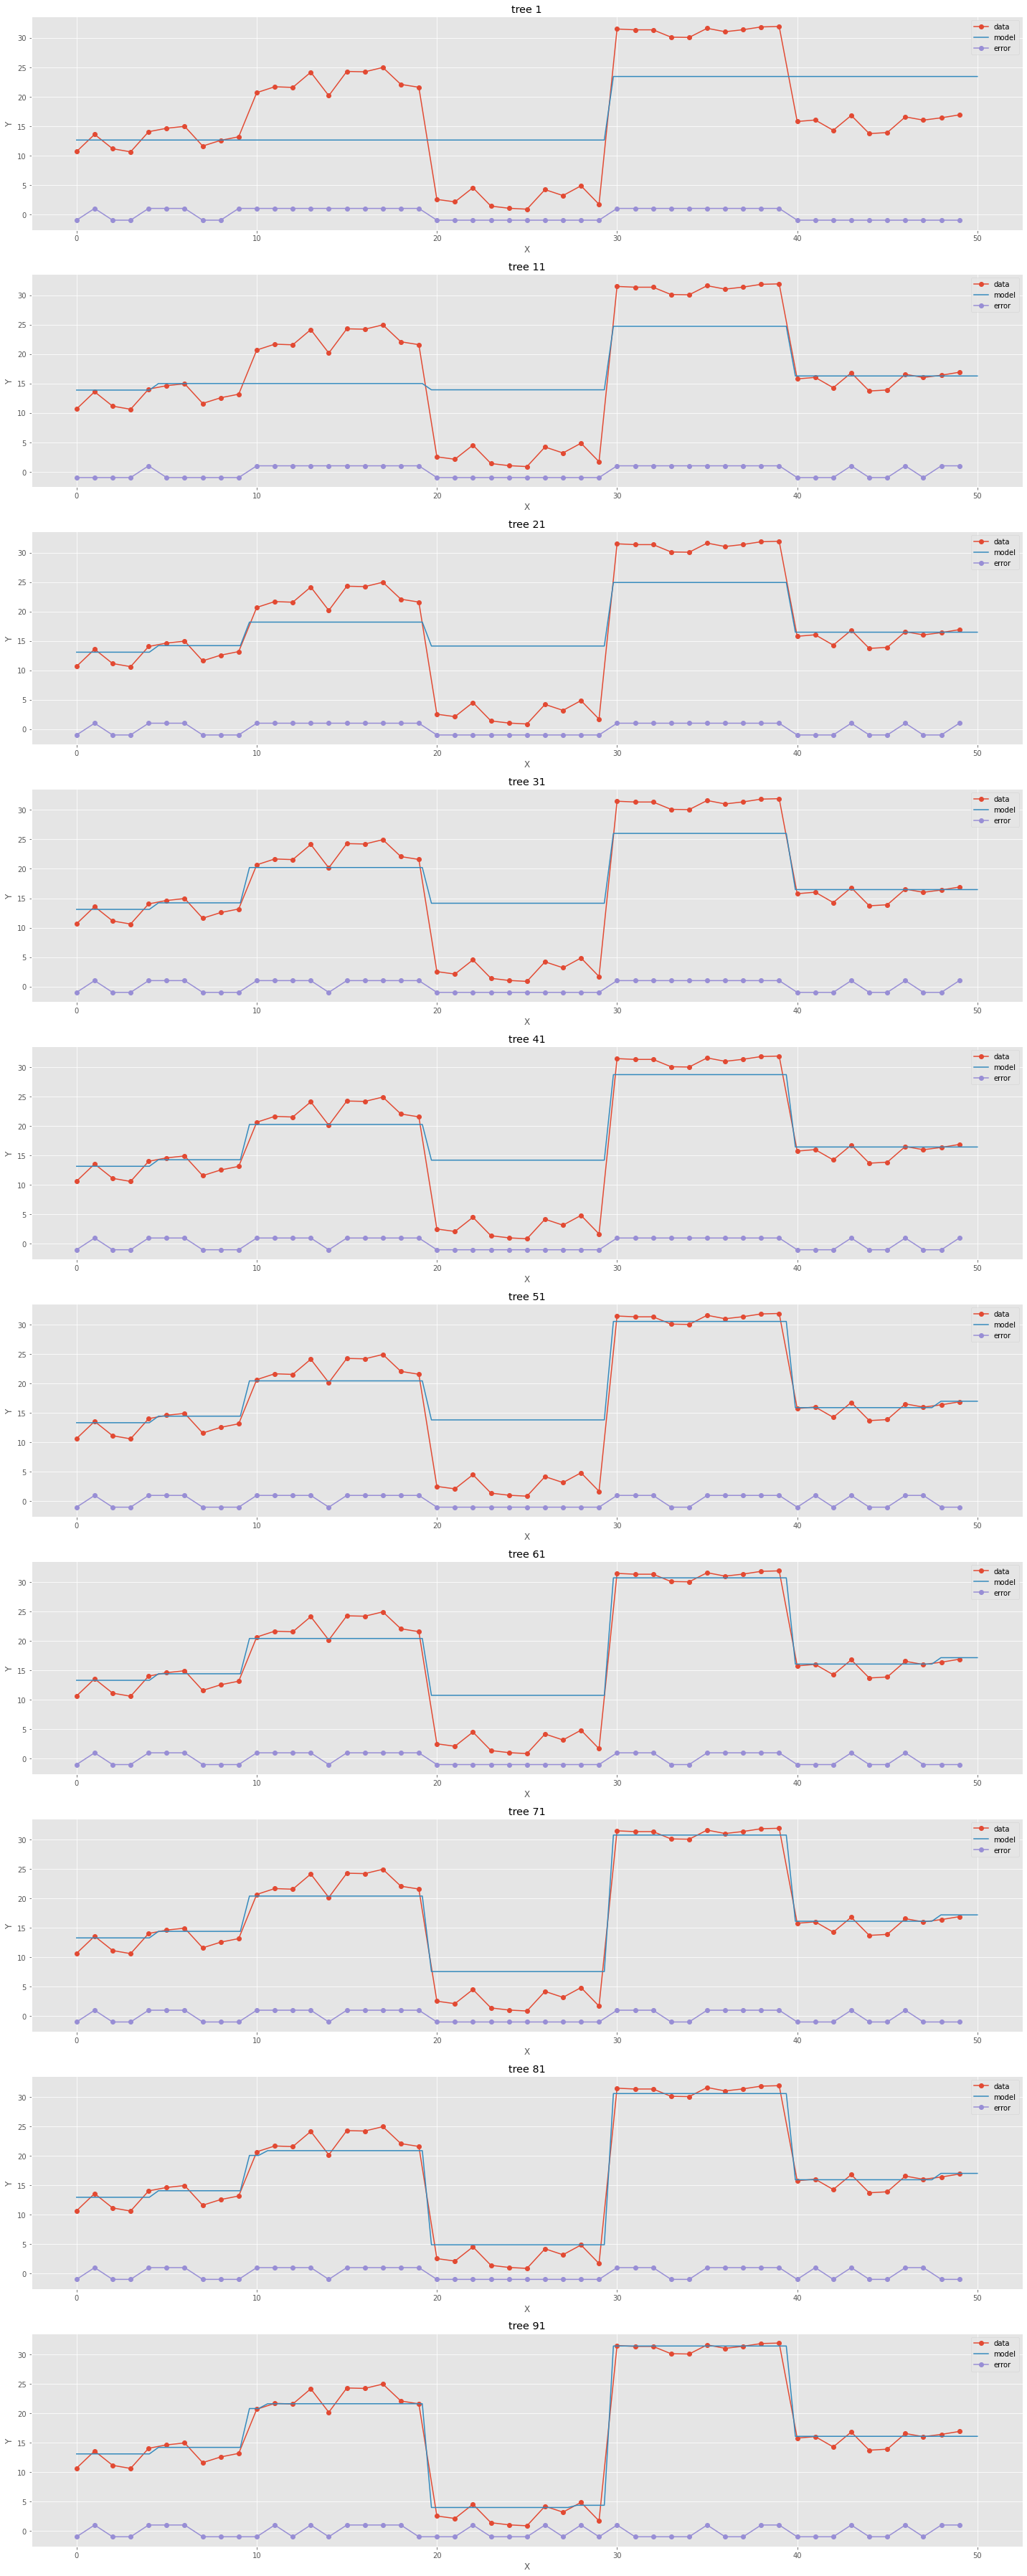

In [ ]:
X = x.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 20, 50
trees = []
err = y
plot_num = 1
# train 100 decision trees
for i in range(100):
    est = DecisionTreeRegressor(max_leaf_nodes=2)
    est.fit(X, err)
    trees.append(est)
    y_pred = np.sum([tree.predict(X) for tree in trees], axis=0)
    err = y - y_pred
    #err = np.array([1 if v > 0 else (-1 if v < 0 else 0) for v in (y - y_pred)])
    if i % 10 == 0:
        plt.subplot(10, 1, plot_num)
        plot_num += 1
        tx = np.linspace(0, 50, 100)
        ty = np.sum([tree.predict(tx.reshape(-1, 1)) for tree in trees], axis=0)
        plt.plot(x, y, 'o-', label = 'data')
        plt.plot(tx, ty, label='model')
        plt.plot(X, err, 'o-', label='error')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('tree %d' % (i+1))
        _ = plt.legend()
plt.tight_layout()